<a href="https://colab.research.google.com/github/lawalAfeez820/Deep-learning/blob/main/REGULARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEIGHT REGULARIZATION ON AN AVILA PATTERN CLASSIFIER

Regularization is one of the technique used in preventing overfitting of machine learning model.There are various form of regularization some of them are 
1. l2 regularizer
2. l1 regularizer
3. Dropout
4. Early stopping etc.

We will be examamining l1 and l2 regularizer in this activity,l2  regularizer works by reducing the weights to close to zero but l1 regularizer create sparse matrix of the weights i.e it makes most of the weight equals to zero. 

## ABOUT THE DATASET

The avila dataset has been extracted from 800 images of the avila Bible, a giant 12th century  latin copy of the Bible. The dataset consists of various features about the images of the text, such as intercolumnar distance and the margins of the text.The dataset also contains a class label that indicates if a pattern of the image falls into the most frequently occuring category or not. 
The dataset is cleaned and well scale.
## AIM

To build a keras model to perform classificaion on the dataset according to given network architecture and hyperparameter values.The goal is to apply different types of wight regularization on the model ad observe how each type changes the result.

In [36]:
# library

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.activations import sigmoid,relu,tanh
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.regularizers import l2,l1,l1_l2

In [ ]:
#loading the dataset into pandas dataframe
features=pd.read_csv("/content/avila-tr_feats.csv")
target=pd.read_csv("/content/avila-tr_target.csv")

In [ ]:
#first five row of the data
features.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [ ]:
features.shape

(10430, 10)

In [ ]:
target.head()

,Class
0,1
1,1
2,1
3,1
4,0


In [ ]:
# spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(features,target,stratify=target,random_state=20,test_size=0.2)

In [27]:
# creating a keras model with three hidden layers[10,6,4] to perform the classification without regularizer 

model=Sequential()

model.add(Dense(input_dim=features.shape[1],units=10,kernel_initializer="he_uniform",activation="relu"))

model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

model.add(Dense(units=4,kernel_initializer="he_uniform",activation="relu"))

model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])


In [28]:
history=model.fit(x_train,y_train,validation_data=[x_test,y_test],batch_size=20,epochs=100)

Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 0.7151 - accuracy: 0.5622 - val_loss: 0.6625 - val_accuracy: 0.5882
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.5912 - val_loss: 0.6420 - val_accuracy: 0.5954
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6303 - accuracy: 0.5937 - val_loss: 0.6225 - val_accuracy: 0.6035
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.6238 - val_loss: 0.6068 - val_accuracy: 0.6385
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.6474 - val_loss: 0.5924 - val_accuracy: 0.6587
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 0.5844 - accuracy: 0.6643 - val_loss: 0.5777 - val_accuracy: 0.6793
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 0.5722 - accuracy: 0.6826 - val_loss: 0.5655 - val_accuracy: 0.6913

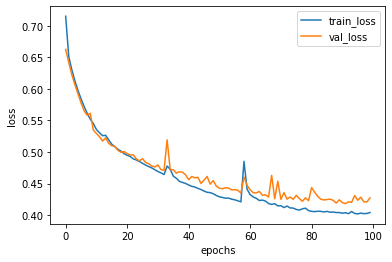

In [32]:
#plotting the losses against the epochs

import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train_loss","val_loss"])
plt.show()

THE VAL LOSS KEEP DECREASING AS THE TRAIN LOSS IS DECREASING THIS A A FAIR RESULT. BUT LET US TRAIN WITH REGULARIZER

In [39]:
# creating a keras model with three hidden layers[10,6,4] to perform the classification with l2 regularizer(lambda=0.01)  in the hidden layers

model=Sequential()

model.add(Dense(input_dim=features.shape[1],units=10,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l2(0.01)))

model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l2(0.01)))

model.add(Dense(units=4,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l2(0.01)))

model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
history2=model.fit(x_train,y_train,validation_data=[x_test,y_test],batch_size=20,epochs=100)

Epoch 1/100
418/418 [==============================] - 1s 2ms/step - loss: 1.0389 - accuracy: 0.5700 - val_loss: 0.9876 - val_accuracy: 0.5872
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 0.9619 - accuracy: 0.5882 - val_loss: 0.9340 - val_accuracy: 0.5887
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 0.9122 - accuracy: 0.5902 - val_loss: 0.8892 - val_accuracy: 0.5887
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8697 - accuracy: 0.5934 - val_loss: 0.8498 - val_accuracy: 0.5959
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8319 - accuracy: 0.6034 - val_loss: 0.8137 - val_accuracy: 0.6136
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 0.7968 - accuracy: 0.6216 - val_loss: 0.7794 - val_accuracy: 0.6414
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 0.7636 - accuracy: 0.6535 - val_loss: 0.7452 - val_accuracy: 0.6496

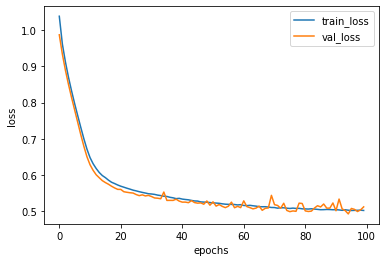

In [41]:
#plotting the losses against the epochs



plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train_loss","val_loss"])
plt.show()

THE REGULARIZER DIDN'T AFFECT THE MODEL LOSS THAT MUCH

In [42]:
# creating a keras model with three hidden layers[10,6,4] to perform the classification with l1 regularizer(lambda=0.01)  in the hidden layers

model=Sequential()

model.add(Dense(input_dim=features.shape[1],units=10,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l1(0.01)))

model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l2(0.01)))

model.add(Dense(units=4,kernel_initializer="he_uniform",activation="relu",kernel_regularizer=l1(0.01)))

model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

history3=model.fit(x_train,y_train,validation_data=[x_test,y_test],batch_size=20,epochs=100)

Epoch 1/100
418/418 [==============================] - 3s 5ms/step - loss: 1.2432 - accuracy: 0.5610 - val_loss: 1.1853 - val_accuracy: 0.5964
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 1.1363 - accuracy: 0.6128 - val_loss: 1.1000 - val_accuracy: 0.6117
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 1.0561 - accuracy: 0.6339 - val_loss: 1.0214 - val_accuracy: 0.6390
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 0.9806 - accuracy: 0.6572 - val_loss: 0.9464 - val_accuracy: 0.6716
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 0.9147 - accuracy: 0.6870 - val_loss: 0.8832 - val_accuracy: 0.7105
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8644 - accuracy: 0.7016 - val_loss: 0.8332 - val_accuracy: 0.7162
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 0.8229 - accuracy: 0.7094 - val_loss: 0.7929 - val_accuracy: 0.7176